In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# energygenerationdata = pd.read_csv("../data/time_series_60min_singleindex.csv",
#                         usecols=(lambda s: s.startswith('utc') | 
#                                  s.startswith('DE_solar') |
#                                  s. startswith('DE_wind')),
#                         parse_dates=[0], index_col=0)

# windgenerationdata = pd.read_csv("../data/time_series_60min_singleindex.csv",
#                         usecols=(lambda s: s.startswith('utc') | 
#                                  s. startswith('DE_wind_generation')),
#                         parse_dates=[0], index_col=0)

solargenerationdata = pd.read_csv("../data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s.startswith('DE_solar_generation')),
                        parse_dates=[0], index_col=0)

In [3]:
# weatherdata = pd.read_csv("../data/weather_data.csv",
#                 usecols=(lambda s: s.startswith('utc') | 
#                          s.startswith('DE')),
#                 parse_dates=[0], index_col=0)

In [4]:
# solardata = pd.read_csv("../data/weather_data.csv",
#                 usecols=(lambda s: s.startswith('utc') | 
#                          s.startswith('DE_radiation_direct_horizontal') |
#                          s.startswith('DE_radiation_diffuse_horizontal')),
#                 parse_dates=[0], index_col=0)

solardata = pd.read_csv("../data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('DE_temperature') |
                         s.startswith('DE_radiation_direct_horizontal') |
                         s.startswith('DE_radiation_diffuse_horizontal')),
                parse_dates=[0], index_col=0)

In [5]:
solardata

,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal
utc_timestamp,,,
1980-01-01 00:00:00,-1.261,0.0000,0.0000
1980-01-01 01:00:00,-1.414,0.0000,0.0000
1980-01-01 02:00:00,-1.571,0.0000,0.0000
1980-01-01 03:00:00,-1.760,0.0000,0.0000
1980-01-01 04:00:00,-1.995,0.0000,0.0000
1980-01-01 05:00:00,-2.190,0.0000,0.0000
1980-01-01 06:00:00,-2.316,0.0000,0.0000
1980-01-01 07:00:00,-2.439,0.1648,4.9126
1980-01-01 08:00:00,-2.204,2.0364,38.6062


In [6]:
#creating training data but cutting the data based on time stamp
# start_remove = pd.to_datetime('2016-01-01')
# end_remove = pd.to_datetime('2017-01-01')
# windspeedformatted = windspeed.loc[(windspeed.index >= start_remove)]
# windgenerationdataformatted = windgenerationdata.loc[(windgenerationdata.index >= start_remove) & (windgenerationdata.index < end_remove)]

# start_remove = pd.to_datetime('2015-01-01')
# end_remove = pd.to_datetime('2016-01-01')
# windspeedformatted = windspeed.loc[(windspeed.index >= start_remove)]
# windgenerationdataformatted = windgenerationdata.loc[(windgenerationdata.index >= start_remove) & (windgenerationdata.index < end_remove)]


# training and data set

# start_remove = pd.to_datetime('2015-01-01')
# end_remove = pd.to_datetime('2016-12-01')
# windspeedformatted = windspeed.loc[(windspeed.index >= start_remove) & (windspeed.index < end_remove)]
# windgenerationdataformatted = windgenerationdata.loc[(windgenerationdata.index >= start_remove) & (windgenerationdata.index < end_remove)]

# start_test = pd.to_datetime('2016-12-01')
# end_test = pd.to_datetime('2017-01-01')
# windspeedtest = windspeed.loc[(windspeed.index >= start_test)]
# windgenerationtest = windgenerationdata.loc[(windgenerationdata.index >= start_test) & (windgenerationdata.index < end_test)]



start_train = pd.to_datetime('2015-01-01')
end_train = pd.to_datetime('2016-01-01')
solardatatrain = solardata.loc[(solardata.index >= start_train) & (solardata.index < end_train)]
solargenerationtrain = solargenerationdata.loc[(solargenerationdata.index >= start_train) & (solargenerationdata.index < end_train)]

start_test = pd.to_datetime('2016-01-01')
end_test = pd.to_datetime('2017-01-01')
solardatatest = solardata.loc[(solardata.index >= start_test)]
solargenerationtest = solargenerationdata.loc[(solargenerationdata.index >= start_test) & (solargenerationdata.index < end_test)]


In [7]:
# windspeedformatted.replace([np.inf, -np.inf], 0)

In [8]:
#creating test/comparison data
# start_test = pd.to_datetime('2015-01-01')
# end_test = pd.to_datetime('2016-01-01')
# windspeedtest = windspeed.loc[(windspeed.index >= start_test) & (windspeed.index < end_test)]
# windgenerationtest = windgenerationdata.loc[(windgenerationdata.index >= start_test) & (windgenerationdata.index < end_test)]

In [9]:
solardatatrain

,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal
utc_timestamp,,,
2015-01-01 00:00:00,-0.981,0.0000,0.0000
2015-01-01 01:00:00,-1.035,0.0000,0.0000
2015-01-01 02:00:00,-1.109,0.0000,0.0000
2015-01-01 03:00:00,-1.166,0.0000,0.0000
2015-01-01 04:00:00,-1.226,0.0000,0.0000
2015-01-01 05:00:00,-1.305,0.0000,0.0000
2015-01-01 06:00:00,-1.478,0.0000,0.0000
2015-01-01 07:00:00,-1.692,0.4328,6.7680
2015-01-01 08:00:00,-1.046,8.8773,51.9464


In [10]:
solargenerationtrain

,DE_solar_generation_actual
utc_timestamp,
2015-01-01 00:00:00,0.0
2015-01-01 01:00:00,0.0
2015-01-01 02:00:00,0.0
2015-01-01 03:00:00,0.0
2015-01-01 04:00:00,0.0
2015-01-01 05:00:00,0.0
2015-01-01 06:00:00,0.0
2015-01-01 07:00:00,53.0
2015-01-01 08:00:00,773.0


In [11]:
# max(windgenerationdataformatted['DE_wind_generation_actual'])

In [12]:
# min(windgenerationdataformatted['DE_wind_generation_actual'])

In [13]:
solargenerationtrain = solargenerationtrain * 1e-3

In [14]:
solargenerationtest = solargenerationtest * 1e-3

In [15]:
solargenerationtest

,DE_solar_generation_actual
utc_timestamp,
2016-01-01 00:00:00,0.000
2016-01-01 01:00:00,0.000
2016-01-01 02:00:00,0.000
2016-01-01 03:00:00,0.000
2016-01-01 04:00:00,0.000
2016-01-01 05:00:00,0.000
2016-01-01 06:00:00,0.000
2016-01-01 07:00:00,0.137
2016-01-01 08:00:00,0.964


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
#train test might not be valid for our case because we have timestamps in play
# xtr, xts, ytr, yts = train_test_split(windspeedformatted,windgenerationdataformatted, test_size = 0.33)

In [18]:
#inital model training attempt
# model = LinearRegression().fit(xtr,ytr)
# predicted = model.predict(windspeedformatted)

In [19]:
#attempt at cross validation
# from sklearn.model_selection import cross_val_score

# model = LinearRegression()

# scores_wind = cross_val_score(model, windspeedformatted, windgenerationdataformatted, cv=5)
# print(scores_wind, "\naverage =", np.mean(scores_wind))

In [20]:
#predict using train test split data
# predicted = model.predict(xts)

In [21]:
# predicted

In [22]:
#error when using model from cross validation
# predicted = model.predict(windspeedformatted)

In [23]:
#timeseries used as x axis when plotting predicted
# timeseries = pd.date_range('2016-01-01', '2016-12-31 23:00:00', freq='H')

In [24]:
# timeseries

In [25]:
# windgenerationdataformatted.plot(linewidth=0.5)

In [26]:
# I think this is an invalid test because using entire dataset in the predict but the training data is from that same set
# plt.plot(timeseries,predicted, linewidth=0.5)

In [27]:
'''
Todo:
take in weather data and generation data
separate data into two sets:
Solar
X = [sun related weather columns] 
Y = wind_generation_actual
Wind:
X = [wind related weather columns] 
Y = sun_generation_actual

Trim data based on timestamp
Wind generation begins at 2010-01-01
However there are values with NaN.
No wind data past 2016
Only valid times for dataset is 2015-01-01 to 2017

Solar generation begins at 2012-01-01

To try: if there are timestamps do I have to format data?
'''

'\nTodo:\ntake in weather data and generation data\nseparate data into two sets:\nSolar\nX = [sun related weather columns] \nY = wind_generation_actual\nWind:\nX = [wind related weather columns] \nY = sun_generation_actual\n\nTrim data based on timestamp\nWind generation begins at 2010-01-01\nHowever there are values with NaN.\nNo wind data past 2016\nOnly valid times for dataset is 2015-01-01 to 2017\n\nSolar generation begins at 2012-01-01\n\nTo try: if there are timestamps do I have to format data?\n'

In [28]:
# np.any(np.isnan(windspeedformatted))

In [29]:
# np.all(np.isfinite(windspeedformatted))

In [30]:
# windspeedformatted = windspeedformatted[~windspeedformatted.isin([np.nan, np.inf, -np.inf]).any(1)]

In [31]:
# np.where(windspeedformatted.values >= np.finfo(np.float64).max)

In [32]:
# windspeedformatted

In [33]:
# np.any(np.isnan(windspeedformatted))

In [34]:
# windgenerationdataformatted

In [35]:
model = LinearRegression().fit(solardatatrain,solargenerationtrain)

In [36]:
#using the previously formatted data which is data from 2015
prediction = model.predict(solardatatest)

In [37]:
timeseries = pd.date_range('2016-01-01', '2016-12-31 23:00:00', freq='H')

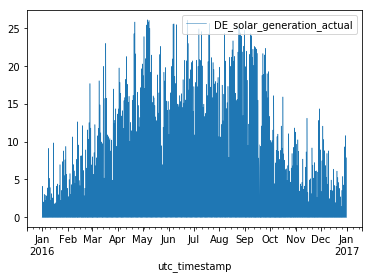

In [38]:
solargenerationtest.plot(linewidth=0.5)

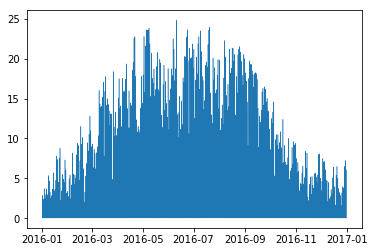

In [39]:
plt.plot(timeseries,prediction, linewidth=0.5)

In [40]:
from sklearn.metrics import r2_score
print(r2_score(solargenerationtest, prediction))

0.9550456762466297


In [41]:
#large number because we're deadling with large numbers
from sklearn.metrics import mean_squared_error
print(mean_squared_error(solargenerationtest, prediction))

1.6357585602882454


In [42]:
print(np.sum((solargenerationtest-prediction)**2)/(prediction.shape[0]))

DE_solar_generation_actual    1.635759
dtype: float64


In [43]:
'''
To do:
Figure out mse (maybe normalize)
figure out cross validation fitting
Incorportate more data (more times and more regions)

NN model experimentation

Expand to solar generation
'''

'\nTo do:\nFigure out mse (maybe normalize)\nfigure out cross validation fitting\nIncorportate more data (more times and more regions)\n\nNN model experimentation\n\nExpand to solar generation\n'